<a href="https://colab.research.google.com/github/showman-sharma/Cartoonize/blob/main/cartoonize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CARTOONIZE

## Import neccessary libraries

In [125]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from google.colab import files #for upload mode
from PIL import Image, ImageFilter
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode

## Function for taking photo

In [149]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Take photo or upload image

## Upload Image

In [176]:
uploaded = files.upload()
name = list(uploaded.keys())[0]

Saving anirudh_official.jpeg to anirudh_official (1).jpeg


## TAKE PHOTO

In [167]:
name = 'photo.jpg'
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err)) 

<IPython.core.display.Javascript object>

Saved to photo.jpg
'module' object is not callable


## The Process

### Read image

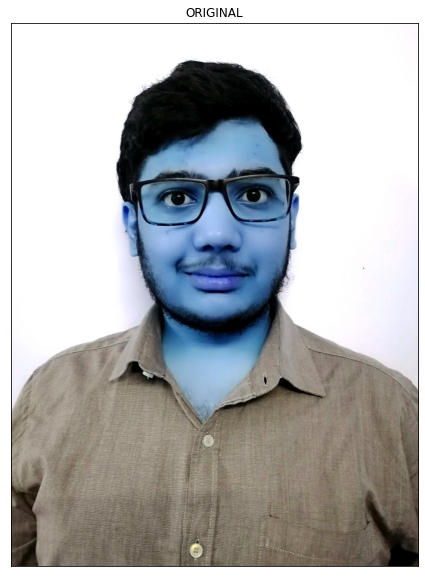

In [177]:
img = cv.imread(name)
plt.figure(figsize=(10,10))
plt.imshow(img);
plt.title('ORIGINAL');
plt.xticks([]), plt.yticks([]);

### Create a blurred version for outline




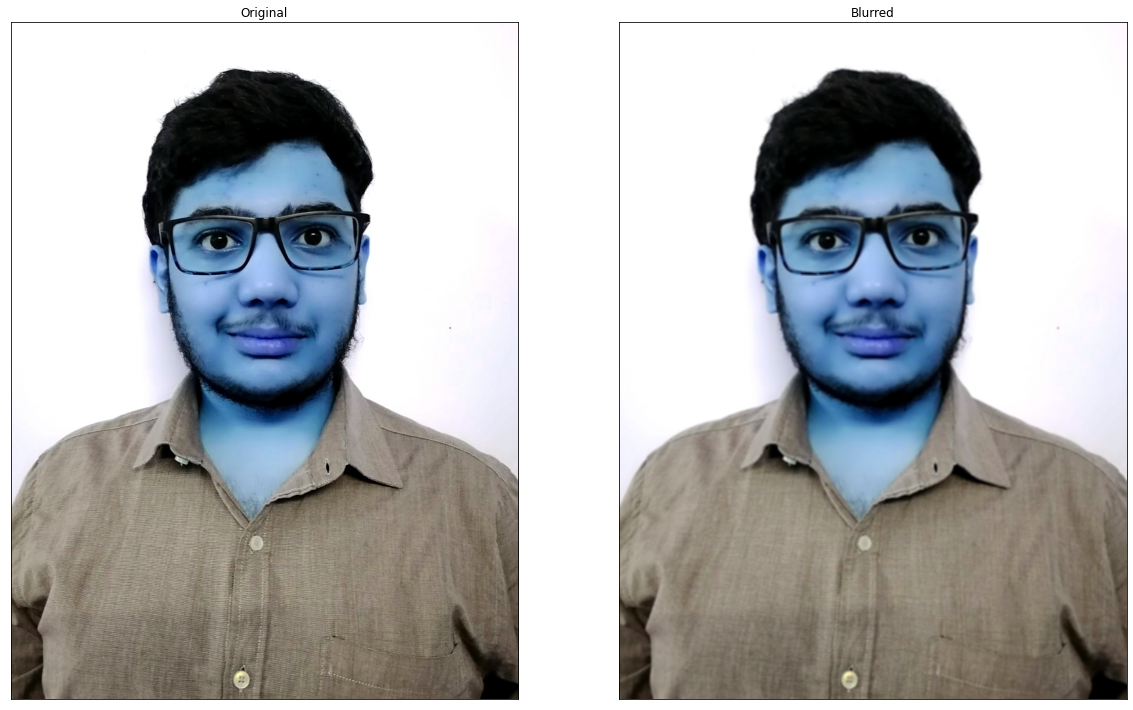

In [178]:
n = 5
kernel = np.ones((n,n),np.float32)/(n*n)
dst = cv.filter2D(img,-1,kernel)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Another blurred verion for background

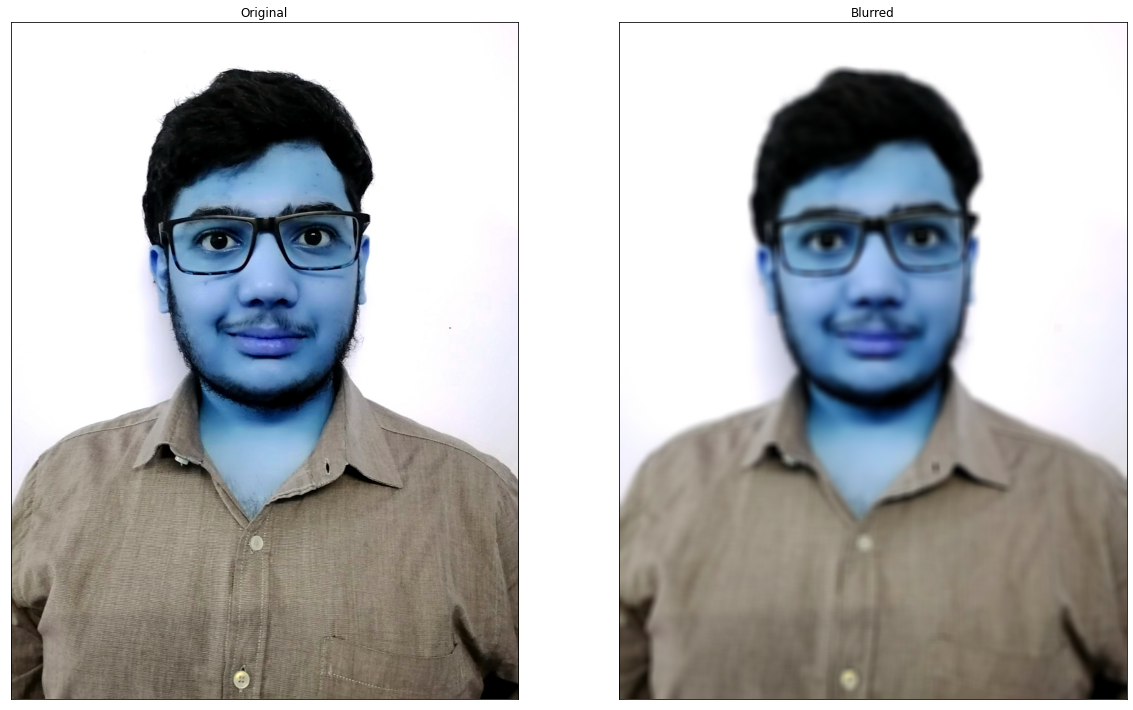

In [179]:
n = 15
kernel = np.ones((n,n),np.float32)/(n*n)
dst2 = cv.filter2D(img,-1,kernel)
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst2),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

### Overlap edges on blur

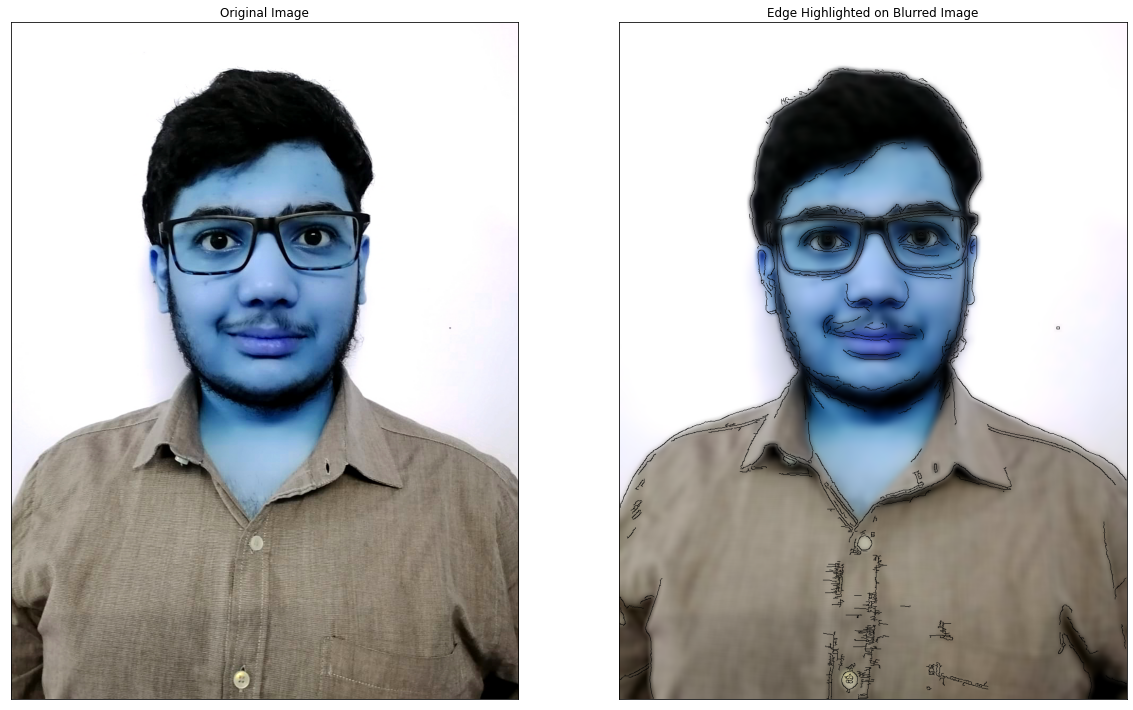

In [180]:
imgbw = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)
edges = cv.Canny(imgbw,30,90)   # canny edge detector
#img3 = cv.merge((img3,img3,img3))  # creat RGB image from grayscale
img2 = dst2.copy()
img2[edges == 255] = [0, 0, 0]  # turn edges to black
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img2)
plt.title('Edge Highlighted on Blurred Image'), plt.xticks([]), plt.yticks([])
plt.show()

### Final Cartoonized Image

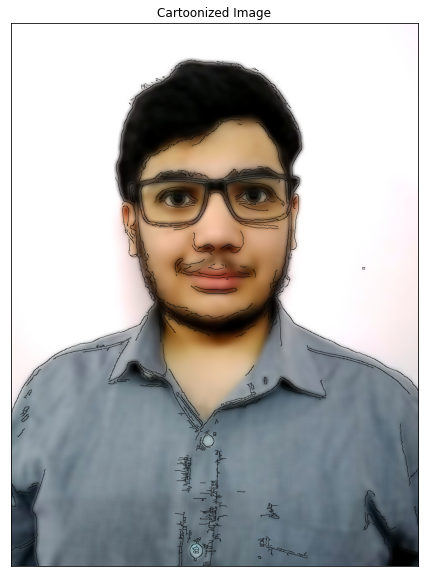

In [181]:
from PIL import Image, ImageFilter
im = Image.fromarray(img2)
b, g, r = im.split()
im = Image.merge("RGB", (r, g, b))
plt.figure(figsize=(10,10));
plt.imshow(im);
plt.title('Cartoonized Image'), plt.xticks([]), plt.yticks([]);


## Download Cartoon

In [132]:
im.save("your_file.jpeg")
im.save('cartoonized_'+name) 
files.download('cartoonized_'+name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>